## PDF Converter 🗓️ + Cleaning and transfer into excel sheet.

In [23]:
import pdfplumber
import re
import pandas as pd

In [33]:
pdf_file_path = 'sqinv-SADE-SAMUEL-000434.pdf'  # Replace with the actual file path

#Empty string to store the concatenated text
text = ''

# Iterate through each page and extract text
with pdfplumber.open(pdf_file_path) as pdf:
    for page_num in range(len(pdf.pages)):
        page = pdf.pages[page_num]
        text += page.extract_text()

![Regex cheat sheet.png](<attachment:Regex cheat sheet.png>)
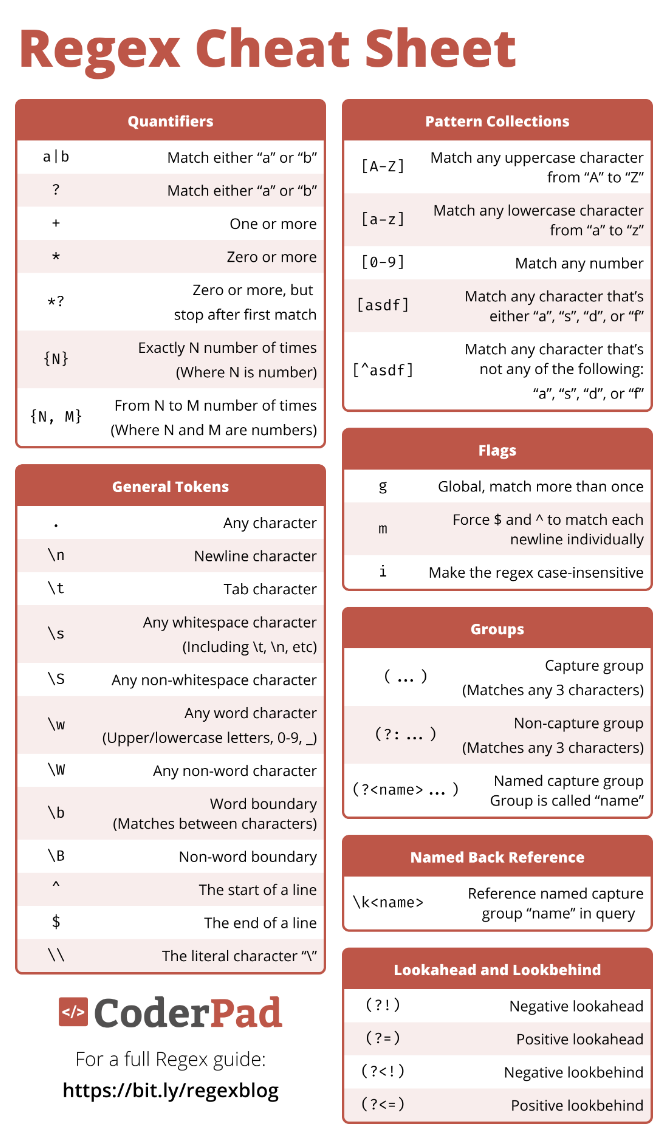

In [37]:
# Split the text into lines and remove empty lines
lines = [line.strip() for line in text.split('\n') if line.strip()]

# Initialize lists to store data
items_data = []

# Define a regex pattern to extract relevant information
pattern = r'(\w+)\s+(\d+)\s+\$([\d.]+)\s+\$([\d.]+)'

# Iterate through lines and extract data
for i in range(1, len(lines)):
    item_info = re.match(pattern, lines[i])
    if item_info:
        item_number, quantity, price, total_price = item_info.groups()
        item_name = lines[i + 1]
        items_data.append({
            'Item Number': item_number,
            'Item Name': item_name,
            'Quantity': int(quantity),
            'Price (US$)': float(price),
            'Total Price(US$)': float(total_price)
        })

# Create a DataFrame from the extracted data
df = pd.DataFrame(items_data)

In [38]:
df

,Item Number,Item Name,Quantity,Price (US$),Total Price(US$)
0,RR06105,CON ARGAN PERFECT EDGES 2.25 OZ EA,12,3.89,46.68
1,RR39765A,CON ARGAN PERFECT EDGES BLACK 2.25 OZ EA,12,3.99,47.88
2,RR21404A,CON ARGAN PERFECT EDGES X/H 2.25 OZ EA,12,3.89,46.68
3,RR00453,CON P/H MASK 6PK- BANANA 3.8 OZ DP,12,15.89,190.68
4,RR00455,CON P/H MASK 6PK- YOGURT 3.8 OZ DP,12,15.89,190.68
...,...,...,...,...,...
72,AD000737,ADORE CREAM PERMANENT KIT 737 MED. BROWN,12,3.89,46.68
73,AD000707,ADORE CREAM PERMANENT KIT 707 MED. CHESTNUT,12,3.89,46.68
74,BYN15135,ESS.LAVENDER OIL 1oz [12/CS],12,5.89,70.68
75,BYN29205,BIOTIN ROSE CLAY [12/DP][2DP/CS],12,12.00,144.00


In [36]:
# Save DataFrame to an Excel file
excel_file_path = 'cleaned_data.xlsx'
df.to_excel(excel_file_path, index=False)

print('Data cleaned and saved to Excel:', excel_file_path)

Data cleaned and saved to Excel: cleaned_data.xlsx
